# Исследование надёжности заёмщиков



#### Краткое описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

#### Описание входных данных

Файл __clients.csv,__ содержащий в табличном виде информацию о клиентах кредитного отдела банка. Таблица содержит следующие столбцы:

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли клиент задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

#### Формулировка задания

Ответить на вопросы:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

## План действий

1. Открыть полученный файл и изучить общую информацию о таблице;
2. Произвести предобработку данных:
 - Обработку пропусков;
 - Обработку дубликатов;
 - Замену типов данных;
 - Лемматизацию данных
3. Выделить различные категории клиентов по интересующим нас признакам (уровень дохода, цель кредита, количество детей, семейное положение);
3. Для каждой из категорий рассчитать относительное количество клиентов, имевших задолженность по кредиту, и на основании получившихся показателей сделать вывод о существовании и характере зависимости.

### Шаг 1. Изучение полученных данных. 

Сначала импортируем необходимые нам модули.

In [369]:
%matplotlib inline                                            
import pandas as pd                                         
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 3.0)

Откроем полученный файл и сохраним полученную таблицу в переменную __clients__. Выведем для наглядности первые несколько строк таблицы.

In [370]:
clients = pd.read_csv('/datasets/data.csv')
clients.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Изучим общую информацию о нашей таблице:

In [371]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Таблица содержит 21525 строк и 12 столбцов. В столбцах указана информация о клиентах: количество детей, трудовой стаж, образование, семейное положение и так далее. Типы данных: целочисленный (__int64__), численный с плавающей точкой (__float64__), строковый (__object__).

Посмотрим, какие значения встречаются в столбцах исследуемой таблицы:

In [372]:
for column in clients.columns:
    print('Значения в столбце "{}":'.format(column))
    try:                 #Конструкция try-except разделяет обработку для разных типов данных 
        print('От {:.0f} до {:.0f}'.format(clients[column].min(), clients[column].max()), '\n')#Для чисел выведем диапазон значений
    except:
        print(', '.join(map(str, clients[column].unique()[:10])), '\n') #для строковых значений выведем несколько примеров

Значения в столбце "children":
От -1 до 20 

Значения в столбце "days_employed":
От -18389 до 401755 

Значения в столбце "dob_years":
От 0 до 75 

Значения в столбце "education":
высшее, среднее, Среднее, СРЕДНЕЕ, ВЫСШЕЕ, неоконченное высшее, начальное, Высшее, НЕОКОНЧЕННОЕ ВЫСШЕЕ, Неоконченное высшее 

Значения в столбце "education_id":
От 0 до 4 

Значения в столбце "family_status":
женат / замужем, гражданский брак, вдовец / вдова, в разводе, Не женат / не замужем 

Значения в столбце "family_status_id":
От 0 до 4 

Значения в столбце "gender":
F, M, XNA 

Значения в столбце "income_type":
сотрудник, пенсионер, компаньон, госслужащий, безработный, предприниматель, студент, в декрете 

Значения в столбце "debt":
От 0 до 1 

Значения в столбце "total_income":
От 20667 до 2265604 

Значения в столбце "purpose":
покупка жилья, приобретение автомобиля, дополнительное образование, сыграть свадьбу, операции с жильем, образование, на проведение свадьбы, покупка жилья для семьи, покупка нед

### Вывод

Полученная от заказчика таблица содержит 21525 строк и 12 столбцов. Каждая строка соответствует записи о клиенте кредитного отдела банка, для которого указаны различные данные: количество детей, трудовой стаж, образование, семейное положение и прочие. 

Для решения поставленной задачи нас интересуют данные столбцов __children__ (количество детей), __family_status__ (семейное положение), __total_income__ (ежемесячный доход), __purpose__ (цель получения кредита) и __debt__ (имел ли клиент задолженность по кредиту).

При просмотре общих сведений о таблице, а также встречающихся в ней значений выявлены следующие проблемы: 
+ столбцы __children__, __days_employed__, __dob_years__, __total_income__ - пропуски или недопустимые значения;
+ столбцы __days_employed__, __total_income__ - числовые значения в формате float (для удобства анализа и отображения целесообразно перевести в целые числа);
+ столбцы __education__, __purpose__ - дубликаты значений, записанные в разных регистрах или формулировках.

На следующем шаге мы исследуем найденные нами ошибки и пропуски в данных, попытаемся определить возможные причины их появления, после чего произведем их обработку.

### Шаг 2. Предобработка данных

### 1. Обработка пропусков
Сначала избавимся от пропусков данных в интересующих нас столбцах.

Начнем со столбца __children__. Пропусков в нем нет, но для некоторых клиентов указаны явно недопустимые значения -1 и 20:

In [373]:
children_distr = clients['children'].value_counts()
print('Количество различных значений столбца children:')
print(children_distr)
print('\nДоля записей с недопустимым значением "children": {:.1%}'.format((children_distr[-1] + children_distr[20])/21525))

Количество различных значений столбца children:
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Доля записей с недопустимым значением "children": 0.6%


Как видно, поле __children__ неправильно заполнено менее чем у одного процента клиентов, что не окажет какого-либо ощутимого влияния на наш анализ. 

Заменим недопустимые значения этого столбца на медианное значение.

In [374]:
med_children = clients['children'].median()  #посчитаем медиану
clients.loc[(clients['children'] == 20) | (clients['children'] == -1), 'children'] = int(med_children)
clients['children'].value_counts()                            #Проверка

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Далее рассмотрим столбцы __days_employed__ и __total_income__. Как мы увидели на прошлом шаге, в этих столбцах есть пропуски. 

In [375]:
print('Количество пропущенных значений:')
print(clients[['days_employed','total_income']].isna().sum())

Количество пропущенных значений:
days_employed    2174
total_income     2174
dtype: int64


Как мы видим, количество пропусков в этих столбцах одинаково. Кроме этого, при просмотре таблицы видно, что пропуски встречаются попарно. Проверим, так ли это для всей таблицы (существуют ли строки, где значение пропущено только в одном из столбцов):

In [376]:
print('Таких записей',
      clients[(clients['total_income'].isna() == True) & (clients['days_employed'].isna() != True)]['debt'].count())

Таких записей 0


Проверим, свойственно ли наличие пропусков в столбце __total_income__ клиентам с определенными типами занятости (например, безработным или студентам):

In [377]:
print('Количество пропущенных значений по каждому типу занятости:')
clients[clients['total_income'].isna() == True].groupby('income_type')['debt'].count()

Количество пропущенных значений по каждому типу занятости:


income_type
госслужащий         147
компаньон           508
пенсионер           413
предприниматель       1
сотрудник          1105
Name: debt, dtype: int64

Как видно, зависимости от типа занятости не наблюдается. 

Можно предположить, что пропуски в столбцах __days_employed__ и __total_income__ появляются, когда в базе данных отсутствует информация о трудовой деятельности клиента - в этом случае не сохраняется ни стаж, ни ежемесячный доход.

Обработаем пропуски в столбце __total_income__. В связи с большим разбросом значений самым разумным видится их заполнение медианными значениями, посчитанными отдельно для каждой категории занятости:   

In [378]:
for i in clients['income_type'].unique():
    med = clients.loc[clients['income_type'] == i,'total_income'].median()  #Рассчет медианы для каждой категории
    clients.loc[clients['income_type'] == i, 'total_income'] = clients.loc[clients['income_type'] == i,'total_income'].fillna(value=med) #Замена
print('Проверка: пропусков в столбце "total_income" после обработки:', clients['total_income'].isna().sum())   #Проверка

Проверка: пропусков в столбце "total_income" после обработки: 0


Теперь разберемся со столбцом __days_employed__. Данные о трудовом стаже не нужны для решения нашей задачи, однако беглый просмотр показывает, что его заполнение происходит некорректно (присутствуют нереалистично большие величины, отрицательные значения, пропуски), о чем стоит сообщить заказчику. Посмотрим подробнее на диапазоны значений столбца по типам занятости:

In [379]:
days_distr = clients.pivot_table(index='income_type', values='days_employed', aggfunc=['min', 'max']).transpose()
days_distr.index = ['минимальный стаж', 'максимальный стаж']
days_distr

income_type,безработный,в декрете,госслужащий,компаньон,пенсионер,предприниматель,сотрудник,студент
минимальный стаж,337524.466835,-3296.759962,-15193.032201,-17615.563266,328728.720605,-520.848083,-18388.949901,-578.751554
максимальный стаж,395302.838654,-3296.759962,-39.954170,-30.195337,401755.400475,-520.848083,-24.141633,-578.751554


Можно заметить следующее:
+ У всех клиентов-пенсионеров и клиентов-безработных значение величины трудового стажа принимает недопустимые значения (свыше 900 лет);
+ Для всех остальных значение трудового стажа указано с отрицательным знаком.

Данные наблюдения указывают на ошибку при сборе или сохранении информации: Например, если стаж считается как разность между текущей датой и датой начала трудовой деятельности, отрицательные значения могут возникать, если эти даты по ошибке поменять местами. Для пенсионеров и безработных ошибочные значения могут получаться из-за некорректной обработки программой даты окончания трудовой деятельности.

С учетом того, что величина трудового стажа не будет задействоваться в дальнейшем анализе, а также того, что "выбросы" характерны только для двух категорий, заменять их на рассчитанные характерные значения мы не будем. Обработаем столбец __days_employed__ следующим образом:
1. Поменяем знак у отрицательных значений;
2. Выбросы заменим на индикаторную величину 0;
3. Пропуски заменим на среднее значение, рассчитанное по каждой категории.

In [380]:
clients['days_employed'] = clients['days_employed'].abs()                   #берем значения столбца по модулю
clients.loc[clients['days_employed'] > (100*365), 'days_employed'] = 0      #меняем слишком большие значения на 0
for i in clients['income_type'].unique():
    avg_days = clients.loc[clients['income_type'] == i,'days_employed'].mean()  #Рассчет среднего
    clients.loc[clients['income_type'] == i, 'days_employed'] = clients.loc[clients['income_type'] == i,'days_employed'].fillna(value=avg_days)
print('Проверка: пропусков в столбце "days_employed":', clients['days_employed'].isna().sum())

Проверка: пропусков в столбце "days_employed": 0


Также избавимся от значений 0 в столбце __dob_years__. Заменим его на среднее значение возраста по каждому типу занятости.

In [381]:
for i in clients['income_type'].unique():
    avg_age = clients.loc[(clients['income_type'] == i) & (clients['dob_years'] != 0),'dob_years'].mean()  #Рассчет среднего
    clients.loc[(clients['income_type'] == i) & (clients['dob_years'] == 0), 'dob_years'] = int(avg_age) #Замена
print('Диапазон значений столбца после обработки :', clients['dob_years'].min(), '-', clients['dob_years'].max())     #Проверка

Диапазон значений столбца после обработки : 19 - 75


Наконец, рассмотрим столбец __gender__. Посчитаем количество ошибочных значений (XNA), которые мы выявили на прошлом шаге.

In [382]:
print('Значений XNA: {}'.format(clients['gender'].value_counts()['XNA']))

Значений XNA: 1


Недопустимое значение всего одно. Вероятно, оно возникло в результате ошибки при заполнении соответствующего поля. Для наших задач пол клиента не важен, так что обрабатывать эту запись мы не будем.

### Вывод

Нами обработаны пропуски и недопустимые значения в столбцах полученной таблицы. Причинами возникновения ошибочных значений могут быть:
+ отсутствие информации (клиент мог не указать соответствующую информацию при оформлении кредита;
+ единичные ошибки при вводе/сохранении/выгрузке информации;

Пропуски в столбцах _"total_income"_ , _"dob_years"_ удалены путем их замены на медиану и среднее значение соответствующей величины, посчитанное для каждого типа занятости. Пропуски в столбце _"children"_ заполнены медианой, посчитанной по всей таблице.

Также нами обнаружено, что столбец _"days_employed"_ содержит большое количество ошибок, связанных, по всей видимости, с неправильным механизмом сохранения информации либо какой-то системной ошибкой, о чем следует сообщить заказчику.
 

### 2. Замена типа данных

Столбцы __days_employed__ и __total_income__ имеют вещественный (float64) тип. Остальные численные данные хранятся в формате int64. Указанные типы для наших целей избыточны, а в случае стажа и месячного дохода - бессмысленны.

Для удобства расчетов и большей ясности отображения заменим тип данных в этих столбцах на целочисленный без знака:

In [383]:
clients[['total_income', 'days_employed']] = clients[['total_income', 'days_employed']].astype('uint')

for column in clients.columns:
    try:
        clients[column] = pd.to_numeric(clients[column], downcast='unsigned')
    except:
        continue

clients.dtypes #Проверка

children             uint8
days_employed       uint16
dob_years            uint8
education           object
education_id         uint8
family_status       object
family_status_id     uint8
gender              object
income_type         object
debt                 uint8
total_income        uint32
purpose             object
dtype: object

### Вывод

Для численных данных в таблице использовались типы данных int64 и float64. Для нашего удобства мы заменили их на тип uint (целое число без знака) с использованием функции `Pands.to_numeric`. Засчет использования параметра downcast мы также уменьшили объем используемой памяти. 

### 3. Обработка дубликатов

Столбец __education__ содержит дублированные значения в разных регистрах. Приведем их к одному регистру:

In [384]:
clients['education'] = clients['education'].str.lower()

В столбцах _"education"_ и _"education_id"_ содержится идентичная информация, просто в первом случае она представлена в виде строки, а во втором - в виде соответствующего идентификатора. Аналогичная ситуаци со столбцами _"family_status"_ и _"family_status_id"_ . Для удобства оставим в нашей таблице только идентификаторы, а их расшифровку вынесем в отдельные таблицы-словари:

In [385]:
edu_dict = clients[['education','education_id']].drop_duplicates().reset_index(drop=True)
edu_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [386]:
fam_dict = clients[['family_status', 'family_status_id']].drop_duplicates().reset_index(drop=True)
clients.drop(['family_status', 'education'], axis=1, inplace=True)        #уберем столбцы из таблицы
fam_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Теперь проверим нашу таблицу на наличие идентичных строк:

In [387]:
print('Дублированных строк:', clients.duplicated().sum())

Дублированных строк: 71


Удалим дубликаты с помощью метода `.drop_duplicates()`:

In [388]:
clients = clients.drop_duplicates().reset_index(drop=True)
print('Проверка: Дублированных строк:', clients.duplicated().sum())

Проверка: Дублированных строк: 0


### Вывод

В столбце _"education"_ присутствовали одинаковые значения, записанные в разных регистрах (например, для клиентов со средним образованием в нем могли встретиться значения "среднее", "Среднее", "СРЕДНЕЕ"). Предполагаем, что возникновение записей такого вида связано с тем, что информация об образовании вводится вручную, вместо того, чтобы выбираться из списка. 

Столбец приведен к нижнему регистру с помощью метода `.str.lower()`, после чего дубликатов в нем не осталось.

После этого мы проверили таблицу на наличие дублированных записей (их оказалось 71) и удалили найденные дубликаты.

Одновременно для удобства отбражения мы оставили в нашей таблице только индикаторы образования и семейного положения, выделив соответствующие им значения полей __education__ и __family_status__ в отдельные словари __edu_dict__ и __fam_dict__.

<font color=blue> Данный пункт исправлен. Здорово.

### 4. Лемматизация

В столбце _"purpose"_ указаны цели взятия кредита в разнообразных формулировках. Проведем лемматизацию значений данного столбца.

In [389]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
clients['purpose'] = clients['purpose'].apply(m.lemmatize)
print('Столбец "purpose" после лемматизации:')
print( clients['purpose'].head())                   #Проверка

Столбец "purpose" после лемматизации:
0                 [покупка,  , жилье, \n]
1       [приобретение,  , автомобиль, \n]
2                 [покупка,  , жилье, \n]
3    [дополнительный,  , образование, \n]
4               [сыграть,  , свадьба, \n]
Name: purpose, dtype: object


### Вывод

Произведена лемматизация столбца _"purpose"_ с использованием метода `.lemmatize()` из модуля Mystem

### 5. Категоризация данных
Произведем категоризацию данных столбца __total_income__. Сначала оценим распределение ежемесячных доходов клиентов:

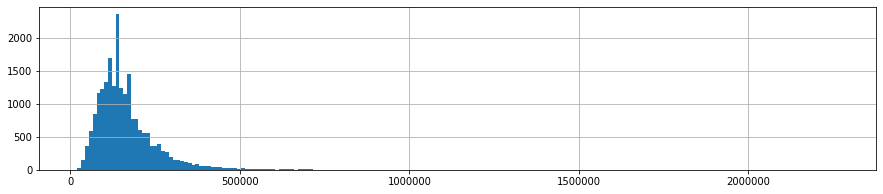

In [390]:
clients['total_income'].hist(bins=200)
plt.show()

Как видно по графику, основная масса клиентов имеет ежемесячный доход в районе 50-300 тысяч рублей, а также присутствует длинный "хвост" с максимальным значением более 2 миллионов рублей в месяц. Выделим следующие категории:
+ менее 100000 руб./месяц;
+ 100000 - 125000 руб./месяц;
+ 125000 - 150000 руб./месяц;
+ 150000 - 175000 руб./месяц;
+ 175000 - 225000 руб./месяц;
+ 225000 - 300000 руб./месяц;
+ более 300000 руб./месяц.

In [407]:
categories_list = ['до 100000', 'до 125000', 'до 150000', 'до 175000', 
                            'до 225000', 'до 300000', 'свыше 300000']
def income_categorizer(income):
    margins = [100000, 125000, 150000, 175000, 225000, 300000]
    cat = 0
    for i in margins:
        if income > i:
            cat +=1
    return(categories_list[cat])
clients['income_cat']=clients['total_income'].apply(income_categorizer)
print('Проверка:')
print(clients[['total_income','income_cat']].head())

Проверка:
   total_income income_cat
0        253875  до 300000
1        112080  до 125000
2        145885  до 150000
3        267628  до 300000
4        158616  до 175000


Теперь произведем категоризацию значений столбца _"purpose"_. Посмотрим, какие леммы есть в этом столбце:

In [392]:
all_lemmas = []
clients['purpose'].apply(all_lemmas.extend)  # создадим список всех лемм в столбце
all_lemmas = Counter(all_lemmas)
for i in list(all_lemmas):
    if len(i) < 5:                        #уберем из полученного списка лемм пробелы, знаки перехода строки и предлоги
        all_lemmas.pop(i)
print('Различные леммы в столбце "purpose"')
print(all_lemmas.most_common())

Различные леммы в столбце "purpose"
[('недвижимость', 6351), ('покупка', 5897), ('жилье', 4460), ('автомобиль', 4306), ('образование', 4013), ('операция', 2604), ('свадьба', 2324), ('строительство', 1878), ('высокий', 1374), ('получение', 1314), ('коммерческий', 1311), ('жилой', 1230), ('сделка', 941), ('дополнительный', 906), ('заниматься', 904), ('проведение', 768), ('сыграть', 765), ('сдача', 651), ('семья', 638), ('собственный', 635), ('ремонт', 607), ('подержанный', 486), ('подержать', 478), ('приобретение', 461), ('профильный', 436)]


Мы видим, что все записи по цели кредита можно разделить на следующие категории:
+ Ремонт жилья
+ Покупка жилья
+ Покупка коммерческой недвижимости
+ Покупка автомобиля
+ Оплата свадебных расходов

Добавим к таблице столбец, в котором будет указана категория цели кредита:

In [393]:
def cat2(lst):
    category_id = 0
    categories = [['коммерческая недвижимость','коммерческий'],
                  ['жилье', 'недвижимость'], 
                  ['дополнительное образование', 'дополнительный'],
                  ['высшее образование', 'образование'],
                  ['ремонт'],
                  ['автомобиль'],
                  ['свадьба']]
    result = ''
    for i in categories:
        if set(i) & set(lst):
            return i[0]
clients['purpose_cat'] = clients['purpose'].apply(cat2)
clients.drop(['purpose'], axis=1, inplace=True)           #столбец purpose нам больше не понадобится

### Вывод

Нами произведена категоризация клиентов банка по уровню доходов и по цели взятия кредита.

---
## Комментарий от наставника

Тут все хорошо. Верная категоризация.

-----

### Шаг 3. Анализ полученных данных
Для оценки результатов нашего анализа сперва вычислим среднюю долю клиентов, имеющих задолженность по кредиту, для всей таблицы:

In [398]:
debt_share = clients['debt'].mean()
print('Она составляет {:.2%}'.format(debt_share))

Она составляет 8.12%


### 1. Есть ли зависимость между наличием детей и возвратом кредита в срок?

Рассмотрим, как изменяется доля клиентов, имевших задолженность по кредиту, в зависимости от количества детей:

In [395]:
def pivot(column):
    debt_by_column = clients.pivot_table(index=column, values='debt', aggfunc=[lambda x: format(x.mean(), '.2%'), 
                                                                              'sum', 'count'])
    debt_by_column.set_axis(['Доля должников', 'Кол-во должников', 'Общее кол-во'], axis='columns', inplace=True )
    return debt_by_column
debt_by_children = pivot('children')
debt_by_children

,Доля должников,Кол-во должников,Общее кол-во
children,,,
0,7.54%,1072.0,14214
1,9.23%,444.0,4808
2,9.45%,194.0,2052
3,8.18%,27.0,330
4,9.76%,4.0,41
5,0.00%,0.0,9


Для клиентов с 4 и 5 детьми значение доли должников не показательно, поскольку их очень мало (50 записей из 21525).
Объединим клиентов с 3, 4 и 5 детьми в категорию "3 и больше детей":

In [396]:
debt_by_children.loc['3 и больше'] = [format(31/380, '.2%'), 31, 380]
debt_by_children.drop([3,4,5])

,Доля должников,Кол-во должников,Общее кол-во
children,,,
0,7.54%,1072.0,14214
1,9.23%,444.0,4808
2,9.45%,194.0,2052
3 и больше,8.16%,31.0,380


Как можно видеть, для клиентов с детьми вероятность наличия задолженности по кредиту
Посчитаем, насколько больше вероятность того, что клиенты с детьми будут иметь задолженность по кредиту, относительно бездетных клиентов:

In [397]:
print('Для клиентов с 1 ребенком она выше на {:.2%}'.format((923 - 754)/754))
print('Для клиентов с 2 детьми она выше на {:.2%}'.format((945 - 754)/754))
print('Для клиентов с 3 и более детьми она выше на {:.2%}'.format((816 - 754)/754))

Для клиентов с 1 ребенком она выше на 22.41%
Для клиентов с 2 детьми она выше на 25.33%
Для клиентов с 3 и более детьми она выше на 8.22%


### Вывод
Мы видим, что зависимость вероятности возврата кредита от количества детей существует: среди клиентов с 1 - 2 детьми доля должников в среднем больше, чем у бездетных, на 2 процента. Или, говоря относительно, вероятность, что клиенты с 1 - 2 детьми будут иметь задолженность, на 22 - 25 процентов больше, чем у бездетных.

Для многодетных же клиентов (3 и более детей) вероятность, что они не вернут кредит в срок, на 8.66% выше, чем у бездетных.

### 2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим аналогичную сводную таблицу для признака __family_status__ :

In [402]:
debt_by_fam = pivot('family_status_id')
debt_by_fam['Семейное положение'] = fam_dict['family_status']
debt_by_fam

,Доля должников,Кол-во должников,Общее кол-во,Семейное положение
family_status_id,,,,
0,7.55%,931.0,12339,женат / замужем
1,9.35%,388.0,4151,гражданский брак
2,6.57%,63.0,959,вдовец / вдова
3,7.11%,85.0,1195,в разводе
4,9.75%,274.0,2810,Не женат / не замужем


Самая много численная категория - женатые/замужние клиенты. Рассчитаем, как относительно этой категории изменяется вероятность наличия задолженности:

In [403]:
print('Для категории "неженат/не замужем" она выше на {:.2%}'.format((975 - 755)/755))
print('Для категории "гражданский брак" она выше на {:.2%}'.format((935 - 755)/755))
print('Для категории "в разводе" она ниже на {:.2%}'.format((755 - 711)/755))
print('Для категории "вдовец / вдова" она ниже на {:.2%}'.format((755 - 657)/755))

Для категории "неженат/не замужем" она выше на 29.14%
Для категории "гражданский брак" она выше на 23.84%
Для категории "в разводе" она ниже на 5.83%
Для категории "вдовец / вдова" она ниже на 12.98%


### Вывод

Зависимость возврата кредита в срок от семейного положения есть. Наименьшее количество должников (6.57%) - среди клиентов, которые указали семейное положение "Вдовец/вдова"; больше всего должников среди неженатых/незамужних клиентов, либо клиентов, состоящих в гражданском браке. Интересно, что клиенты, указавшие, что состоят в разводе, имеют задолженности по кредиту в среднем реже, чем все остальные, за исключением вдовцов. 

### 3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
Для выделенных нами на предыдущем шаге категорий клиентов по уровню дохода сводная  таблица будет выглядеть так:

In [408]:
debt_by_income = pivot('income_cat')
debt_by_income

,Доля должников,Кол-во должников,Общее кол-во
income_cat,,,
до 100000,7.93%,354.0,4463
до 125000,8.78%,289.0,3292
до 150000,8.66%,335.0,3868
до 175000,8.35%,255.0,3053
до 225000,8.02%,241.0,3004
до 300000,7.03%,161.0,2291
свыше 300000,7.15%,106.0,1483


Посчитаем разницу между категориями с самым большим и самым маленьким количеством должников:

In [410]:
print('Она составляет {:.2%}'.format((878 - 703)/878))

Она составляет 19.93%


### Вывод

Как мы видим, зависимость между уровнем дохода и возвратом кредита в срок менее явно выражена, чем для других признаков. Наибольшая часть должников приходится на клиентов с месячным доходом от 100 до 175 тысяч рублей. При дальнейшем росте зарплаты она снижается.

### 4. Как разные цели кредита влияют на его возврат в срок?

In [411]:
pivot('purpose_cat')

,Доля должников,Кол-во должников,Общее кол-во
purpose_cat,,,
автомобиль,9.36%,403.0,4306
высшее образование,9.04%,281.0,3107
дополнительное образование,9.82%,89.0,906
жилье,7.19%,683.0,9500
коммерческая недвижимость,7.55%,99.0,1311
свадьба,8.00%,186.0,2324


### Вывод

Зависимость между целью кредита и возвратом его в срок существует. Наибольшая доля должников - среди клиентов, которые взяли кредит на образование (высшее или дополнительное) и покупку автомобиля. Меньше всего задолженностей у клиентов, которые брали кредит на покупку жилой или коммерческой недвижимости.

### Шаг 4. Общий вывод

Нами проанализирована полученная от заказчика таблица с информацией о клиентах кредитного отдела банка. Задача: определить на основе предоставленных данных, зависит ли наличие задолженности по кредиту у клиента от следующих факторов: 
+ семейное положение;
+ количество детей;
+ уровень дохода;
+ цель взятия кредита.

При просмотре таблицы выявлен ряд проблем с заполнением ее столбцов: пропуски данных, недопустимые значения, дубликаты и нелемматизированные значения, которые были устранены в ходе предобработки данных.

После этого нами оценена доля клиентов, имеющих задолженность по кредиту, по каждой из вышеуказанных категорий.
В результате мы выяснили следующее:
1. Клиенты с детьми в среднем чаще не возвращают кредит в срок, чем клиенты без детей. Особенно это выражено для клиентов с 1 или 2 детьми (доля должников среди них на 22-25 процентов выше, чем у бездетных). Причиной этому можно считать тот факт, что семьи с детьми обычно несут большие ежемесячные расходы, что может сказаться на возможности клиентов вернуть кредитные средства.


2. Наблюдается значительный разброс доли клиентов-"должников" в зависимости от семейного положения. Больше всего их среди клиентов, не состоящих в браке, либо состоящих в гражданском браке. Для заемщиков, которые указали семейное положение "вдовец/вдова" и "в разводе", соотношение, наоборот, меньше среднего. Для определения причины такого разброса полученных нами результатов недостаточно. Можно предположить, что состоящим в браке заемщикам проще выплатить в срок долг по кредиту, поскольку в случае необходимости они могут привлечь средства из семейного бюджета, в отличие от холостых; однако это не объясняет показатели для клиентов-"вдовцов" и разведенных. Можно предположить, что тут оказывают влияние прочие, неисследованные нами в рамках этого задания факторы - возраст, трудовой стаж и прочие.


3. Зависимость вероятности наличия задолженности по кредиту от благосостояния клиента также существует, но она намного менее ярко выражена, чем от прочих рассмотренных факторов: при возрастании ежемесячного дохода доля заемщиков-"должников" немного снижается. Предполагаем, что такая картина может быть вызвана тем фактом, что более обеспеченные люди, как правило, берут кредиты на более крупные суммы, в связи с чем вероятность не вернуть требуемые средства в срок остается относительно неизменной.


4. Также наблюдается значительная разница в относительном количестве должников по кредиту в зависимости от указанной цели получения средств: самая популярная цель - приобретение жилья (и прочей недвижимости) также является и наиболее безопасной с точки зрения наличия задолженности. Заемщики, которые указали в качестве цели кредита покупку автомобиля или получение образования, наоборот, менее надежны. Как и в п.2, предполагаем, что это связано с другими факторами - возрастом и образованием. 